In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [2]:
X = pd.read_csv('../data/processed/df_train.csv').iloc[::, :18:]
y= pd.read_csv('../data/processed/df_train.csv')['satisfaction']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [11]:
model = GradientBoostingClassifier(n_estimators=100,random_state=17)

model_gbc = model.fit(X_train, y_train)
y_pred = model_gbc.predict(X_test)
results_gb = model_selection.cross_val_score(model_gbc, X_test,y_test, cv=10).mean()
results_gb

0.940152016540235

In [12]:
pickle.dump(model_gbc, open('../models/model_gbc.pkl', 'wb')) 

In [16]:
with open('../data/variables_pkl/resultado_gbc.pkl', 'wb') as resultado_gbc:
    pickle.dump(('GradientBoostingClassifier', 0.96121836121836125), resultado_gbc)

In [15]:
recall_score(y_test, y_pred)

0.9612183612183612

accuracy score:   0.9424682658429461
precision score:  0.9380390186720254
recall score:     0.9612183612183612
F1 score:         0.9494872446817527
ROC:              0.9397883509533995
------------------------------------------- 
classification report:       
---------------------------------------------       
                    precision    recall  f1-score   support

           0       0.95      0.92      0.93      9064
           1       0.94      0.96      0.95     11655

    accuracy                           0.94     20719
   macro avg       0.94      0.94      0.94     20719
weighted avg       0.94      0.94      0.94     20719



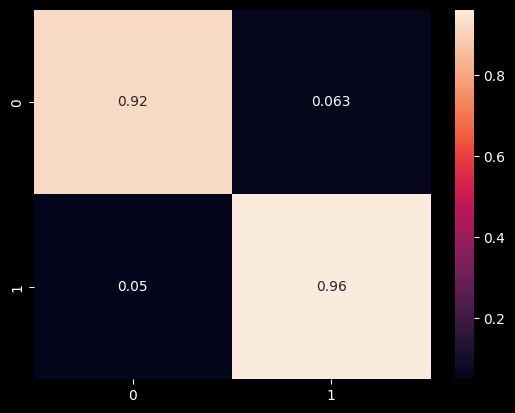

In [14]:


c_mat = confusion_matrix(y_test,y_pred)
c_mat

sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print(f'accuracy score:   {accuracy_score(y_test,y_pred)}')
print(f'precision score:  {precision_score(y_test, y_pred)}')
print(f'recall score:     {recall_score(y_test, y_pred)}')
print(f'F1 score:         {f1_score(y_test, y_pred)}')
print(f'ROC:              {roc_auc_score(y_test, y_pred)}')
print('------------------------------------------- ')
print(f'''classification report:       
---------------------------------------------       
      {classification_report(y_test, y_pred)}''')